<a href="https://colab.research.google.com/github/Marya021/BinarySearchingProblem/blob/Marya/Dog_and_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disini kita akan mengenali gambar kucing dan anjing yang sebenarnya untuk mengklasifikasikan gambar yang masuk sebagai salah satu gambar. 

In [8]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-04-21 07:29:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   114MB/s    in 0.6s    

2021-04-21 07:29:20 (114 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [9]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile (local_zip, 'r')

zip_ref.extractall ('/tmp')
zip_ref.close ()

* Training set adalah data yang digunakan untuk memberi tahu model jaringan saraf 'seperti ini bentukan anjing dan kucing'. The Validation adalag gambaran kucing dan anjing yang tidak akan dilihat oleh jaringan saraf sebagai bagian dari pelatihan, sehingga kita dapat menguji seberapa baik atau buruk kinerja dalam mengevaluasi apalah suatu gambar berisi kucing dan anjing.

In [10]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join (base_dir, 'train')
validation_dir = os.path.join (base_dir, 'validation')

#Direktori dengan gambar kucing / anjing pelatihan kami
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#Direktori dengan gambar kucing/anjing dengan menggunakan validasi
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Selanjutnya kita akan melihat seperti apa nama file di direktori cats dan dogs train

In [11]:
train_cats_fnames = os.listdir (train_cats_dir)
train_dogs_fnames = os.listdir (train_dogs_dir)

print (train_cats_fnames [:10])
print (train_dogs_fnames [:10])

['cat.600.jpg', 'cat.388.jpg', 'cat.18.jpg', 'cat.977.jpg', 'cat.412.jpg', 'cat.290.jpg', 'cat.81.jpg', 'cat.198.jpg', 'cat.765.jpg', 'cat.909.jpg']
['dog.542.jpg', 'dog.480.jpg', 'dog.206.jpg', 'dog.664.jpg', 'dog.635.jpg', 'dog.811.jpg', 'dog.128.jpg', 'dog.551.jpg', 'dog.898.jpg', 'dog.822.jpg']


Kita akan mencari tahu berapa jumlah total gambar kucing dan anjing yang berapa di dalam train dan validation

In [12]:
print ('total gambar kucing pelatihan :', len(os.listdir (train_cats_dir)))
print ('total gambar anjing pelatihan:', len (os.listdir(train_dogs_dir)))

print ('total kucing yang divalidasi:', len(os.listdir(validation_cats_dir)))
print ('total anjing yang divalidasi:', len(os.listdir(validation_dogs_dir)))

total gambar kucing pelatihan : 1000
total gambar anjing pelatihan: 1000
total kucing yang divalidasi: 500
total anjing yang divalidasi: 500


Setelah kita ketahui untuk kucing dan anjing memiliki 1000 gambar pelatihan dan 500 gambar validasi.

Selanjutnya kita akan memahami seperti apa kumpulan data kucing dan anjing.


# **1. Konfigurasikan parameter matplot**

In [13]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Kita akan membuat parameter grafik, disini akan menampilkan dalam konfigurasi 4x4
nrows = 4
ncols = 4

#Kita akan mengulang gambar 
pic_index = 0

Disini kita akan menampilkan 8 gambar kucing dan 8 gambar anjing. Jika melakukan perbahauan maka akan terlihat yang baru


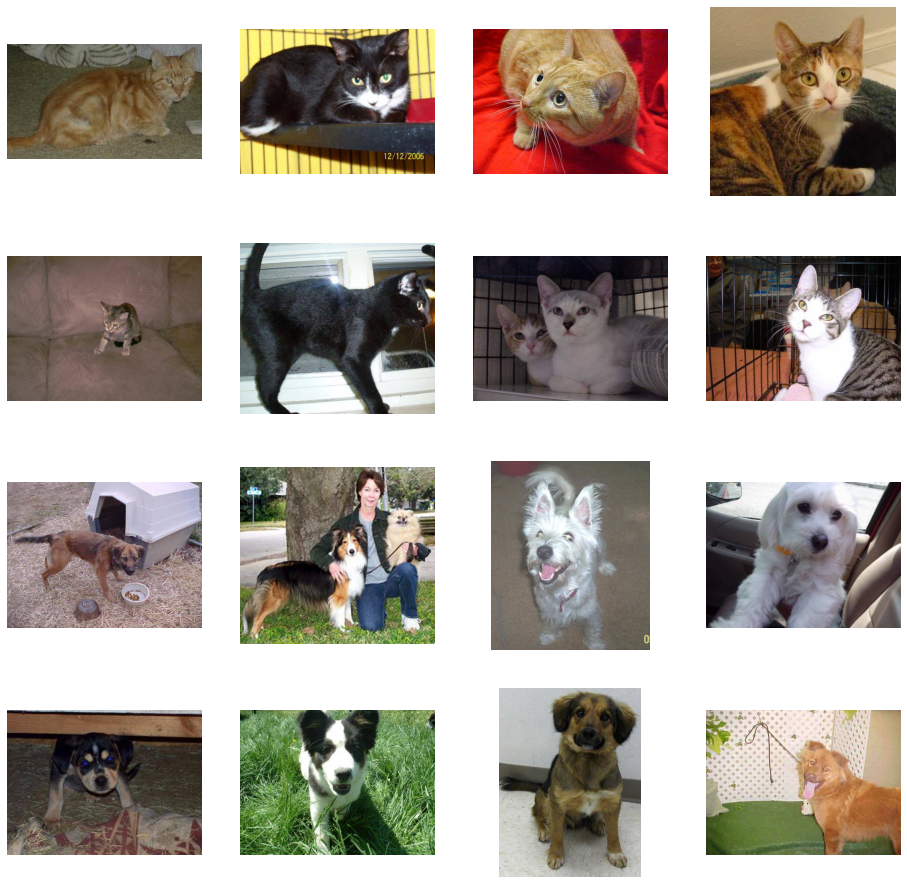

In [14]:
#kita siapkan file matplotlib, dengan ukuran yang sesuai dengan 4x4 pi cs
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix =[os.path.join(train_cats_dir, fname)
for fname in train_cats_fnames[pic_index-8:pic_index]]

next_dogs_pix =[os.path.join(train_dogs_dir, fname)
for fname in train_dogs_fnames[pic_index-8:pic_index]]


for i, img_path in enumerate(next_cat_pix+next_dogs_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Membuat Model**

In [15]:
import tensorflow as tf

In [16]:
model = tf.keras.models.Sequential([
    # Perhatikan bentuk input yang diinginkan yaitu ukuran gambar 150x150 dengan warna 3 byte
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Ratakan hasil untuk dimasukkan ke dalam DNN
    tf.keras.layers.Flatten(), 
    # 512 lapisan tersembunyi neuron
    tf.keras.layers.Dense(512, activation='relu'), 
    # Hanya 1 neuron keluaran.Ii akan berisi0-1 dimana 0 untuk 1 kelas('kucing') dan 1 untuk ('anjing')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

Pemanggilan metode model.summary() mencetak ringkasan NN

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [18]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

# **Processing Data**

Di Keras ini dapat dilakukan melalui keras.preprocessing.image.ImageDataGeneratorkelas menggunakan rescaleparameter. ImageDataGeneratorKelas ini memungkinkan Anda untuk membuat contoh generator kumpulan gambar yang diperbesar (dan labelnya) melalui .flow(data, labels)atau .flow_from_directory(directory). Generator ini kemudian dapat digunakan dengan metode Model Keras yang menerima generator data input: fit, evaluate_generator, dan predict_generator

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# **Training**

Kehilangan dan Akurasi merupakan indikasi kemajuan pelatihan. Itu membuat tebakan untuk klasifikasi data pelatihan, dan kemudian mengukurnya dengan label yang diketahui, menghitung hasilnya. Akurasi adalah bagian dari tebakan yang benar. Akurasi Validasi adalah pengukuran dengan data yang belum digunakan dalam pelatihan. Seperti yang diharapkan, ini akan sedikit lebih rendah. Anda akan mempelajari mengapa hal ini terjadi di bagian overfitting nanti dalam kursus ini.

In [23]:
history = model.fit(train_generator)

100/100 [==============================] - 50s 484ms/step - loss: 1.4941 - accuracy: 0.5288


In [24]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 56s - loss: 0.7051 - accuracy: 0.6120 - val_loss: 0.6433 - val_accuracy: 0.6690
Epoch 2/15
100/100 - 56s - loss: 0.5958 - accuracy: 0.7020 - val_loss: 0.6146 - val_accuracy: 0.6930
Epoch 3/15
100/100 - 55s - loss: 0.5305 - accuracy: 0.7380 - val_loss: 0.9403 - val_accuracy: 0.5760
Epoch 4/15
100/100 - 55s - loss: 0.4257 - accuracy: 0.8005 - val_loss: 0.6221 - val_accuracy: 0.6920
Epoch 5/15
100/100 - 55s - loss: 0.3215 - accuracy: 0.8560 - val_loss: 0.7435 - val_accuracy: 0.6750
Epoch 6/15
100/100 - 55s - loss: 0.2345 - accuracy: 0.9025 - val_loss: 0.7818 - val_accuracy: 0.6760
Epoch 7/15
100/100 - 55s - loss: 0.1585 - accuracy: 0.9440 - val_loss: 1.0033 - val_accuracy: 0.7060
Epoch 8/15
100/100 - 55s - loss: 0.1005 - accuracy: 0.9640 - val_loss: 1.4041 - val_accuracy: 0.6960
Epoch 9/15
100/100 - 55s - loss: 0.0821 - accuracy: 0.9690 - val_loss: 1.5004 - val_accuracy: 0.6910
Epoch 10/15
100/100 - 55s - loss: 0.0587 - accuracy: 0.9800 - val_loss: 1.7524 - val_accura

# **Running Model**

Sekarang kita akan menjalankan prediksi menggunakan model dan memberikan indikasi apakah objek tersebut adalah anjing dan kucing

In [28]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving dog.77.jpg to dog.77.jpg
[1.]
dog.77.jpg is a dog


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


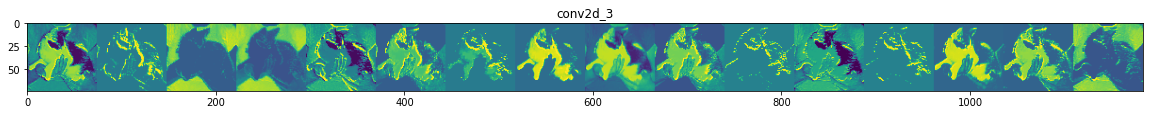

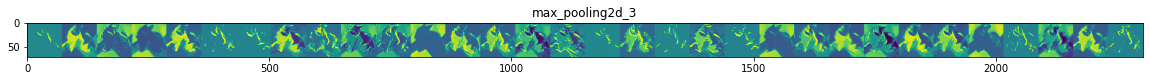

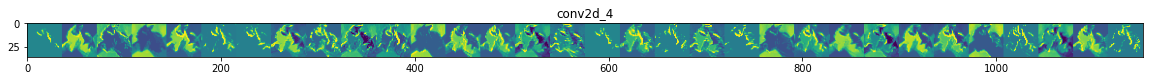

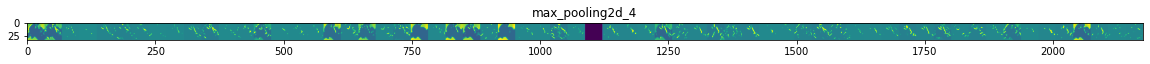

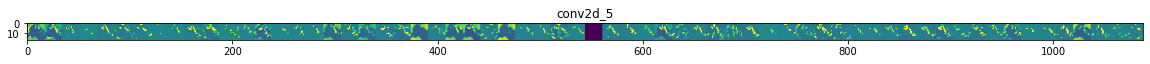

In [31]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Disini kita akan mengakurasi dan mengetahui kerugian dari model


Text(0.5, 1.0, 'Training and validation loss')

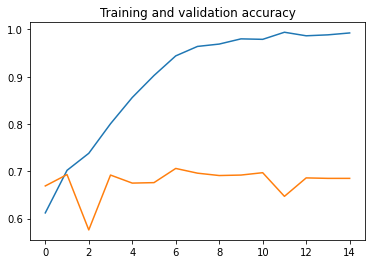

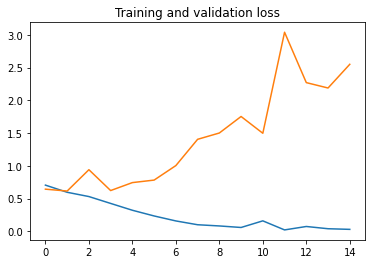

In [32]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )